# ============================================================
# 📌 1️⃣ Setup: Install & Import
# ============================================================

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

# For time series checks
from statsmodels.tsa.stattools import adfuller

# Plot settings
sns.set(style="whitegrid", context="talk")

# ============================================================
# 📌 2️⃣ Load the Data
# ============================================================

In [45]:
# Mount Google Drive
drive.mount('/content/drive')

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

# Create directory structure in Google Drive
base_path = '/content/drive/MyDrive/OilShift'
os.makedirs(f'{base_path}/data/raw', exist_ok=True)
os.makedirs(f'{base_path}/data/processed', exist_ok=True)
os.makedirs(f'{base_path}/results/plots', exist_ok=True)

# Step 1: Load the dataset
data_path = '/content/drive/MyDrive/OilShift/Data/BrentOilPrices.csv'
df = pd.read_csv(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:


# Inspect
print(df.head())
print(df.info())

        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None


In [46]:
# Step 2: Data Cleaning and Preparation
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'])  # Reconvert to datetime for indexing

# Check for duplicates
print("Initial Duplicate Rows:", df.duplicated().sum())
print("Duplicate Dates:", df['Date'].duplicated().sum())

# Remove duplicates, keeping first occurrence
df = df.drop_duplicates(subset=['Date'], keep='first')
print("\nAfter Removing Duplicates:")
print("Rows Remaining:", len(df))
print("Duplicate Rows:", df.duplicated().sum())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Save cleaned dataset
cleaned_path = f'{base_path}/data/processed/brent_oil_prices_cleaned.csv'
df.to_csv(cleaned_path)

Initial Duplicate Rows: 0
Duplicate Dates: 0

After Removing Duplicates:
Rows Remaining: 9011
Duplicate Rows: 0

Missing Values:
Date     0
Price    0
dtype: int64


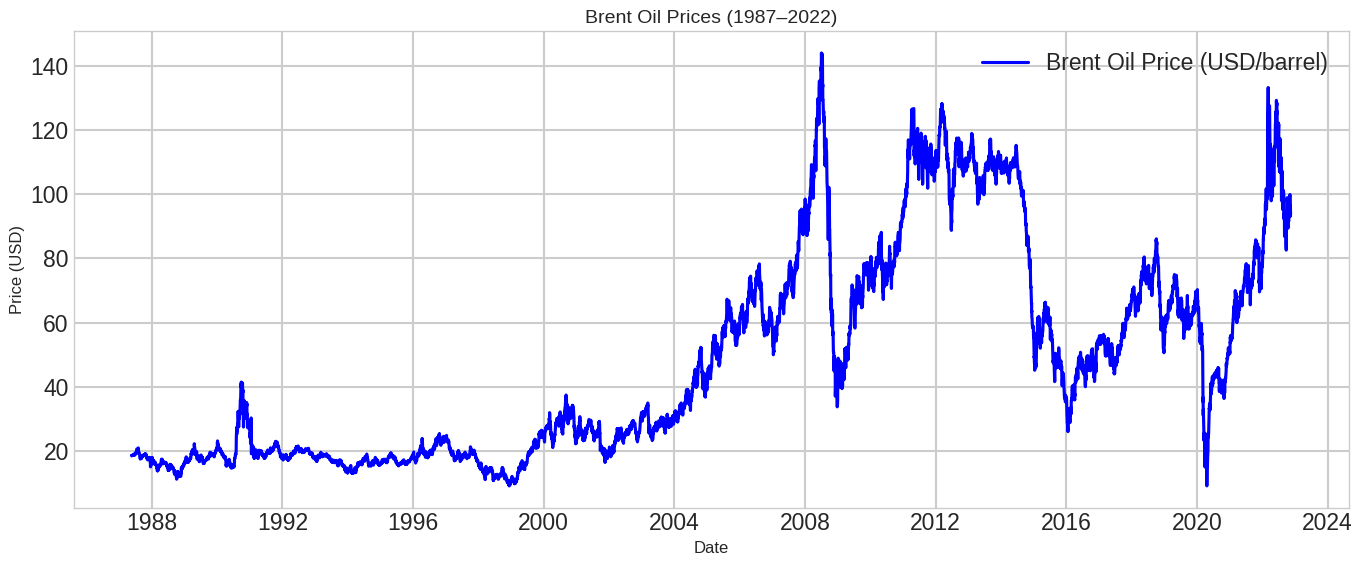

In [47]:
# Step 3: Exploratory Data Analysis (EDA)
# Plot raw price series
plt.figure(figsize=(14, 6))
plt.plot(df['Price'], label='Brent Oil Price (USD/barrel)', color='blue')
plt.title('Brent Oil Prices (1987–2022)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{base_path}/results/plots/raw_price_trend.png')
plt.show()


ADF Test for Prices:
ADF Statistic: -1.9939
p-value: 0.2893
Non-Stationary

ADF Test for Log Returns:
ADF Statistic: -16.4271
p-value: 0.0000
Stationary


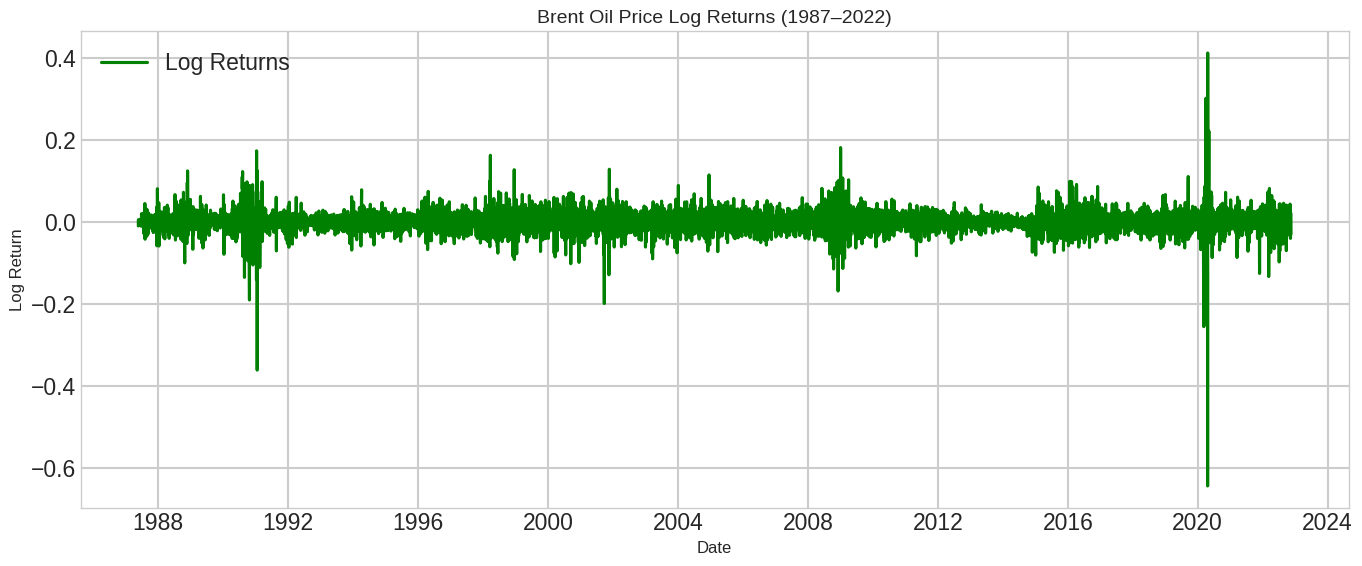

In [48]:
# Step 4: Analyze Stationarity
# Compute log returns
df['Log_Returns'] = np.log(df['Price']).diff()

# Save log returns
log_returns_path = f'{base_path}/data/processed/log_returns.csv'
df[['Log_Returns']].to_csv(log_returns_path)

# Perform ADF test on prices
adf_price = adfuller(df['Price'].dropna())
print("\nADF Test for Prices:")
print(f"ADF Statistic: {adf_price[0]:.4f}")
print(f"p-value: {adf_price[1]:.4f}")
print("Stationary" if adf_price[1] < 0.05 else "Non-Stationary")

# Perform ADF test on log returns
adf_returns = adfuller(df['Log_Returns'].dropna())
print("\nADF Test for Log Returns:")
print(f"ADF Statistic: {adf_returns[0]:.4f}")
print(f"p-value: {adf_returns[1]:.4f}")
print("Stationary" if adf_returns[1] < 0.05 else "Non-Stationary")

# Plot log returns
plt.figure(figsize=(14, 6))
plt.plot(df['Log_Returns'], label='Log Returns', color='green')
plt.title('Brent Oil Price Log Returns (1987–2022)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Log Return', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{base_path}/results/plots/log_returns.png')
plt.show()

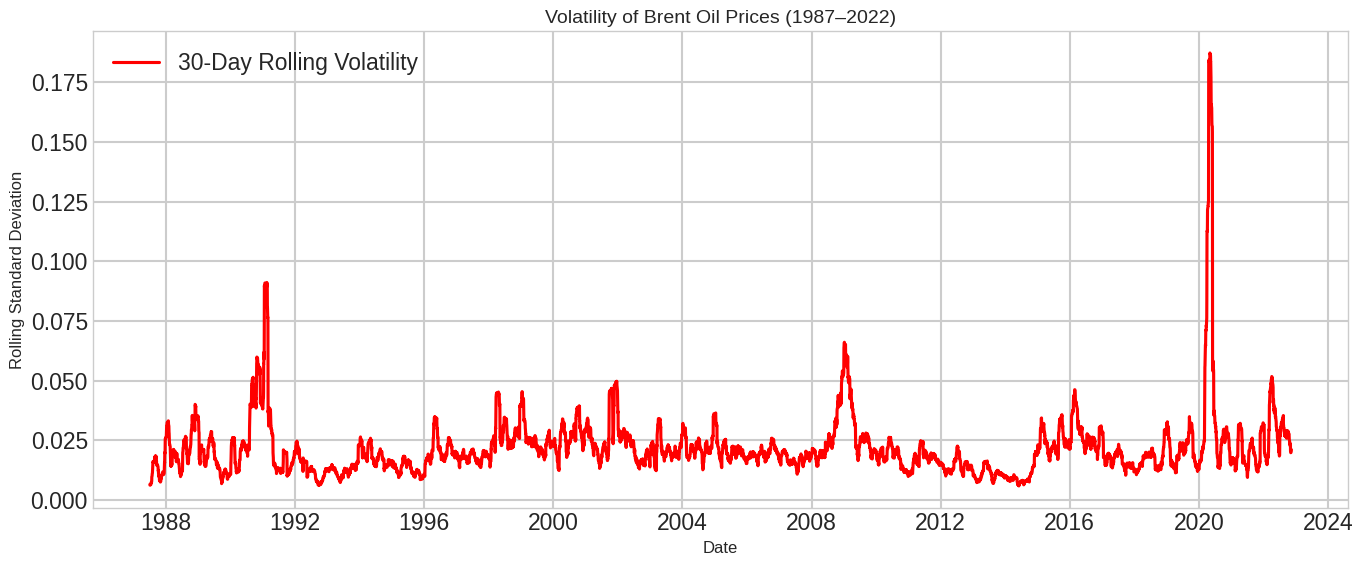

In [51]:
# Step 5: Analyze Volatility
# Plot 30-day rolling standard deviation of log returns
df['Volatility'] = df['Log_Returns'].rolling(window=30).std()
plt.figure(figsize=(14, 6))
plt.plot(df['Volatility'], label='30-Day Rolling Volatility', color='red')
plt.title('Volatility of Brent Oil Prices (1987–2022)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Standard Deviation', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{base_path}/results/plots/volatility.png')
plt.show()



In [50]:
# Step 6: Save Summary Table
summary = pd.DataFrame({
    'Metric': ['Mean Price', 'Std Price', 'Min Price', 'Max Price',
              'Mean Log Return', 'Std Log Return', 'Rows After Cleaning'],
    'Value': [df['Price'].mean(), df['Price'].std(), df['Price'].min(),
              df['Price'].max(), df['Log_Returns'].mean(), df['Log_Returns'].std(), len(df)]
})
summary_path = f'{base_path}/results/summary_table.csv'
summary.to_csv(summary_path, index=False)
print("\nSummary Table:")
print(summary)


Summary Table:
                Metric        Value
0           Mean Price    48.420782
1            Std Price    32.860110
2            Min Price     9.100000
3            Max Price   143.950000
4      Mean Log Return     0.000179
5       Std Log Return     0.025532
6  Rows After Cleaning  9011.000000


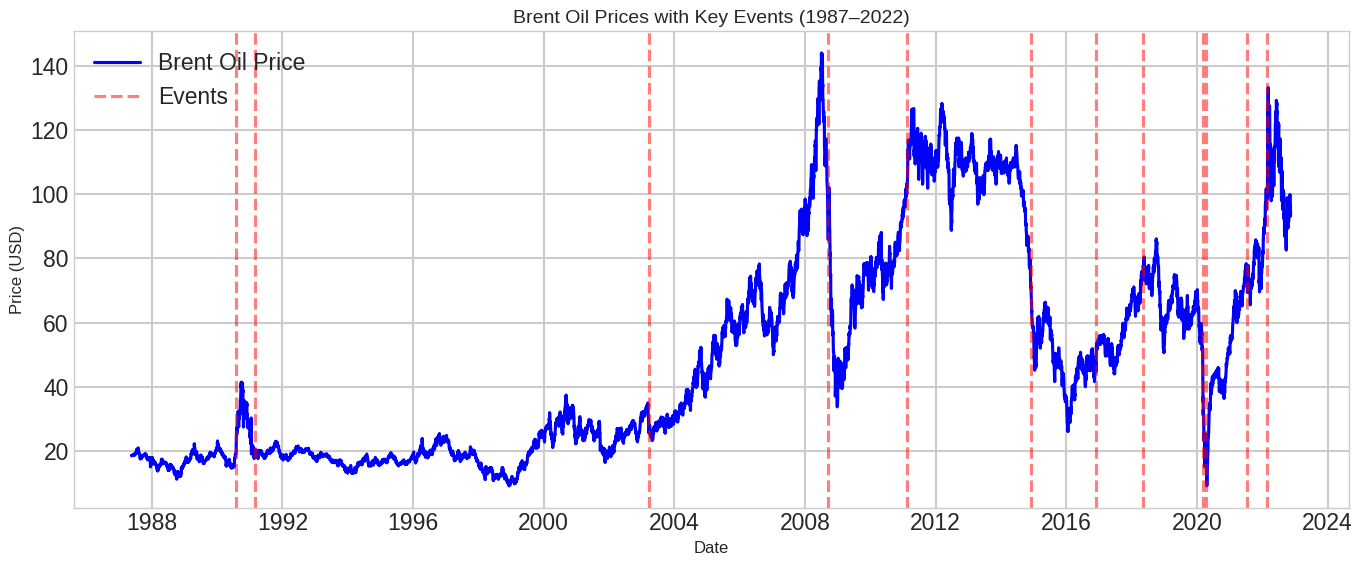

In [52]:
# Step 7: Visualize Events (Preliminary for Task 2)
# Create and save key_events.csv
events_path = f'{base_path}/data/raw/key_events.csv'
events = pd.DataFrame({
    'Date': ['1990-08-02', '1991-02-28', '2003-03-20', '2008-09-15', '2011-02-15',
             '2014-11-27', '2016-11-30', '2018-05-08', '2020-03-11', '2020-04-12',
             '2021-07-18', '2022-02-24'],
    'Event': ['Iraq invades Kuwait', 'Gulf War ends', 'US-led invasion of Iraq',
              'Global Financial Crisis begins', 'Arab Spring unrest in Libya',
              'OPEC maintains production', 'OPEC production cuts',
              'US sanctions on Iran', 'COVID-19 pandemic', 'OPEC+ production cuts',
              'OPEC+ increases production', 'Russia invades Ukraine'],
    'Category': ['Geopolitical Conflict', 'Geopolitical Conflict', 'Geopolitical Conflict',
                 'Economic Shock', 'Geopolitical Conflict', 'OPEC Policy', 'OPEC Policy',
                 'Sanctions', 'Demand Shock', 'OPEC Policy', 'OPEC Policy', 'Geopolitical Conflict']
})
events['Date'] = pd.to_datetime(events['Date'])
events.to_csv(events_path, index=False)

# Plot prices with event markers
plt.figure(figsize=(14, 6))
plt.plot(df['Price'], label='Brent Oil Price', color='blue')
for idx, row in events.iterrows():
    plt.axvline(row['Date'], color='red', linestyle='--', alpha=0.5, label='Events' if idx == 0 else None)
plt.title('Brent Oil Prices with Key Events (1987–2022)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{base_path}/results/plots/price_with_events.png')
plt.show()